# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [3]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [6]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-16-austin/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [10]:
# Step 1, drop NaN
df.dropna(axis=0, inplace=True)
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


In [17]:
# Step 2, train test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop("Observed", axis=1), train_df["Observed"]
X_test, y_test = test_df.drop("Observed", axis=1), test_df["Observed"]
X_train

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MIROC6,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1
time,,,,,,,,,,,,,,,,,,,,,
1953-10-26,17.906051,0.837579,9.753198e-14,0.018863,2.878923e-01,0.007043,1.227189e-01,1.085584e+01,0.022752,0.472927,...,4.563272e-01,6.688447e+00,2.860546e+00,9.779330e-14,2.980863e-01,1.659176e-13,3.841924e+00,2.713473,6.594400e-01,0.129196
1921-10-22,0.515505,1.911354,1.135404e+00,0.000002,4.091981e-01,0.009669,7.420817e-02,1.239226e+00,3.566098,0.667190,...,1.074893e+01,2.368273e-01,6.528480e-01,1.132699e-13,7.653117e-08,4.560164e-03,4.178978e-02,7.909935,2.067648e-01,2.018346
1925-01-22,0.161412,2.666091,7.012887e-02,2.040689,1.338349e+01,0.073243,2.552343e-04,1.349633e+00,0.075959,0.059223,...,1.945362e-03,1.082573e-01,2.977031e+00,1.320287e-13,1.937005e-04,1.692996e-13,1.290949e-03,0.183711,1.733777e+00,0.932259
1902-11-21,3.651607,3.117433,1.142701e-13,0.000016,4.658142e-09,3.913076,9.442968e+00,7.203823e-01,5.314680,0.122738,...,2.310382e+00,1.635075e-01,2.131350e-02,9.901551e-01,1.142382e+00,1.840662e-03,4.955181e-02,0.000068,1.298833e+01,0.005468
1925-02-17,0.635625,39.042773,1.084678e+00,31.690315,6.208601e-09,0.416932,7.337828e-01,4.238512e-03,0.439862,0.404930,...,1.103781e-02,4.388535e-13,2.544746e-02,2.918170e+00,1.314147e-01,3.690330e-01,2.357034e-08,0.036247,2.987665e-01,2.923645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910-04-09,0.148872,0.002789,1.484854e-02,21.972655,4.106228e+00,4.366387,3.023449e+00,8.233286e-03,14.374214,0.004196,...,2.955313e+00,1.005828e-05,5.328879e-02,1.144262e-13,3.944834e-04,6.158946e+00,5.484728e-01,2.780504,2.572049e+00,0.108625
1931-02-17,2.564109,0.000679,2.304275e+00,1.376829,2.344160e+00,0.280475,7.628959e-01,1.130374e-02,0.176314,0.168514,...,1.899535e-15,1.058082e+01,1.393032e+00,6.145611e-02,1.041555e+01,1.943845e-13,3.161930e+00,0.000017,2.685817e+00,2.015153
1937-07-30,0.112727,0.247349,4.266945e+00,0.061475,4.903452e-04,0.518605,5.171097e-01,6.649084e+00,2.194583,3.394174,...,5.462397e+00,2.304702e+00,1.143579e-13,8.450165e-01,1.151981e-04,7.236151e-08,1.165880e+01,0.015212,3.227688e-08,0.972568


In [20]:
# Step 3, EDA summary statistics
print(X_train.describe())
print(f'The number of rows in the training set is: {train_df.shape[0]}')
print(f'The number of different models is: {train_df.shape[1]} ')

         ACCESS-CM2  ACCESS-ESM1-5  AWI-ESM-1-1-LR   BCC-CSM2-MR  \
count  36791.000000   36791.000000    3.679100e+04  3.679100e+04   
mean       2.429419       2.938955    3.716329e+00  2.203086e+00   
std        6.791374       7.048794    7.280859e+00  6.518224e+00   
min        0.000000       0.000000    9.161142e-14  4.211430e-24   
25%        0.054108       0.021248    2.961787e-02  5.089918e-04   
50%        0.192980       0.492758    5.923147e-01  9.644146e-02   
75%        1.445456       2.398539    3.601697e+00  1.318940e+00   
max      149.967634     157.605713    8.946575e+01  1.344652e+02   

           BCC-ESM1  CMCC-CM2-HR4  CMCC-CM2-SR5     CMCC-ESM2       CanESM5  \
count  3.679100e+04  36791.000000  3.679100e+04  3.679100e+04  36791.000000   
mean   2.748441e+00      3.092784  3.575203e+00  3.489756e+00      2.879339   
std    5.997439e+00      6.459254  7.353451e+00  7.039201e+00      6.898890   
min    1.091904e-24      0.000000 -4.503054e-17 -3.186177e-19      0.00

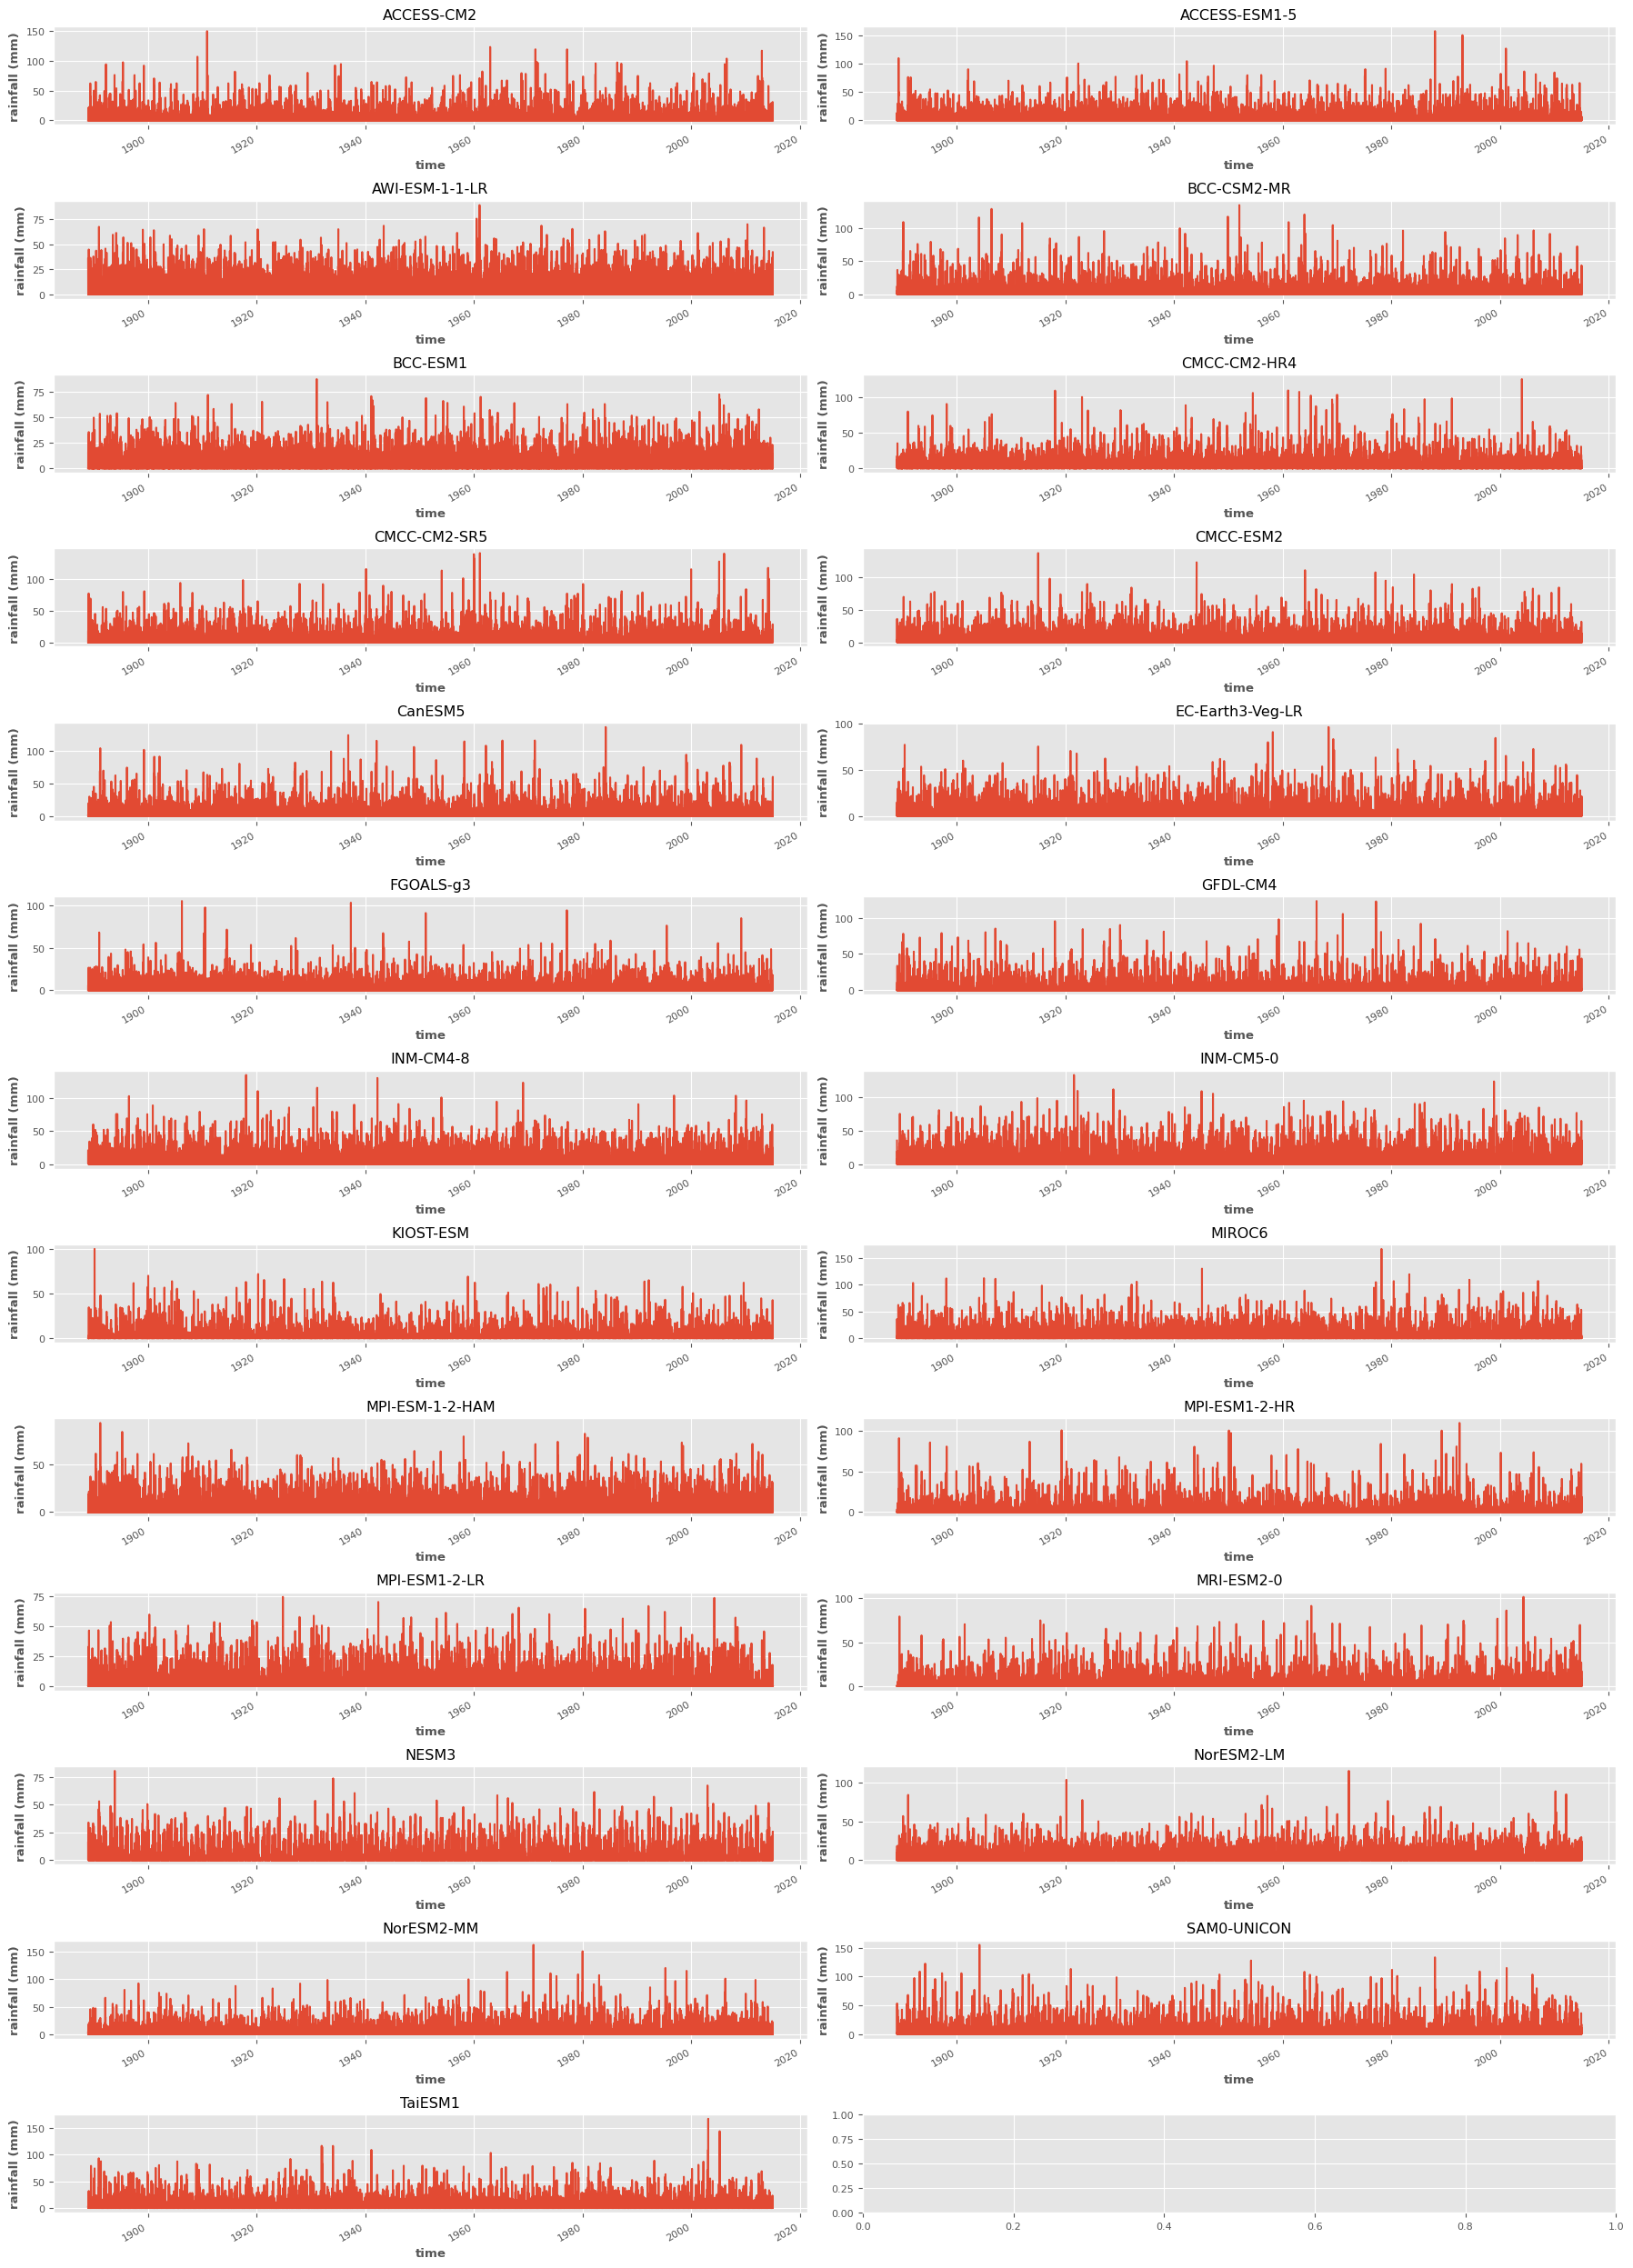

In [37]:
# Step 3 EDA visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

fig = plt.figure(figsize=(18, 25))

axes = fig.subplots(nrows=13, ncols=2)
axes = axes.flatten()
for n, col in enumerate(X_train.columns):
    X_train[col].plot(ax=axes[n], ylabel='rainfall (mm)', title=col)

fig.tight_layout()
plt.show()

In [39]:
# Step 5, Train on RandomForestRegressor ensemble model
forest = RandomForestRegressor()
forest.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# Step 5, predict on test set
pred = forest.predict(X_test)
forest_rmse = mean_squared_error(pred, y_test, squared=False)
print(f'The root mean squared error for the trained model is: {forest_rmse:.2f}')

In [42]:
# Step 6, compare with other models
rmse_results = {
    'Model': ['RandomForestRegressor'],
    'RMSE': [forest_rmse]
}

for model in X_train.columns:
    rmse_results['Model'].append(model)
    rmse = mean_squared_error(y_train, X_train[model], squared=False)
    rmse_results['RMSE'].append(rmse)

rmse_df = pd.DataFrame(rmse_results).round(2)
rmse_df

,Model,RMSE
0,ACCESS-CM2,10.57
1,ACCESS-ESM1-5,10.64
2,AWI-ESM-1-1-LR,10.88
3,BCC-CSM2-MR,10.29
4,BCC-ESM1,10.07
5,CMCC-CM2-HR4,10.35
6,CMCC-CM2-SR5,10.94
7,CMCC-ESM2,10.71
8,CanESM5,10.57
9,EC-Earth3-Veg-LR,9.90


### Step 6, discussion
From the above results, it appears that the untuned RandomForestRegressor model is performing better than the individual climate models with a lower RMSE score. This makes sense in that the ensemble model is learning from all the other climate models to make its predictions.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [ ]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=___, max_depth=___)
model.fit(X_train, y_train)

In [ ]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

In [ ]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.